# EDA give credit

In [1]:
import pandas as pd
import numpy as np
import matplotlib.style as style
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
import seaborn as sns
style.use('ggplot')
from IPython.display import display, HTML
from pylab import rcParams
%matplotlib inline

In [10]:
train = pd.read_csv("data/cs-training.csv", index_col=0)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


In [44]:
train.isna().sum()*100.0/train.shape[0]

SeriousDlqin2yrs                         0.000000
RevolvingUtilizationOfUnsecuredLines     0.000000
age                                      0.000000
NumberOfTime30-59DaysPastDueNotWorse     0.000000
DebtRatio                                0.000000
MonthlyIncome                           19.820667
NumberOfOpenCreditLinesAndLoans          0.000000
NumberOfTimes90DaysLate                  0.000000
NumberRealEstateLoansOrLines             0.000000
NumberOfTime60-89DaysPastDueNotWorse     0.000000
NumberOfDependents                       2.616000
dtype: float64

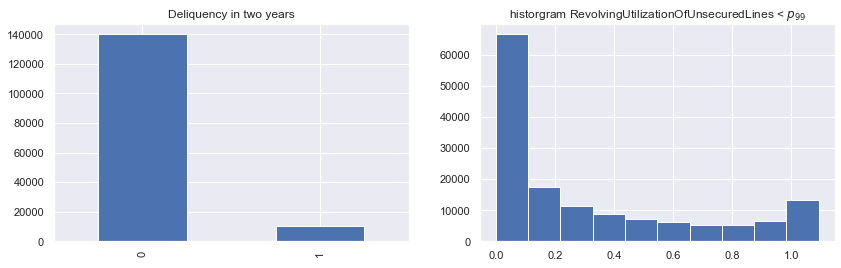

In [42]:
sns.set(rc={'figure.figsize': (14, 4)})
fig, axes = plt.subplots(nrows=1, ncols=2)
title = train.SeriousDlqin2yrs.value_counts(dropna=False).plot(
    kind="bar", ax=axes[0]).set_title("Deliquency in two years")

p_99 = np.quantile(train.RevolvingUtilizationOfUnsecuredLines, 0.99)
title = train.RevolvingUtilizationOfUnsecuredLines[train.RevolvingUtilizationOfUnsecuredLines < p_99].hist(
    ax=axes[1]).set_title(r"historgram RevolvingUtilizationOfUnsecuredLines < $p_{99}$")

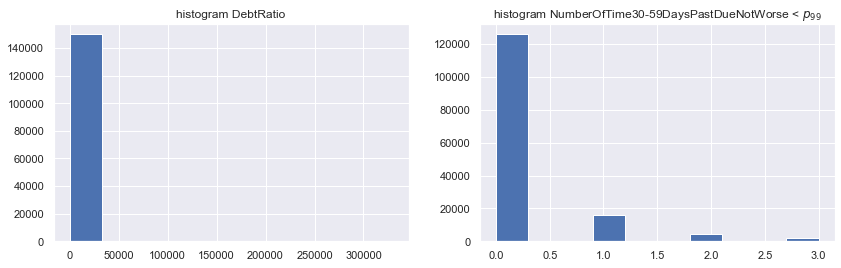

In [64]:
sns.set(rc={'figure.figsize': (14, 4)})
fig, axes = plt.subplots(nrows=1, ncols=2)
title = train.DebtRatio.hist(
    ax=axes[0]).set_title("histogram DebtRatio")
p_99 = np.quantile(train["NumberOfTime30-59DaysPastDueNotWorse"], 0.99)
title = train["NumberOfTime30-59DaysPastDueNotWorse"][train["NumberOfTime30-59DaysPastDueNotWorse"]<p_99].hist(
    ax=axes[1]).set_title("histogram NumberOfTime30-59DaysPastDueNotWorse < $p_{99}$")

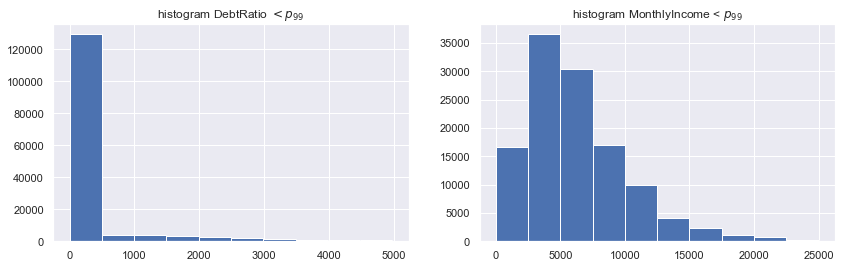

In [65]:
sns.set(rc={'figure.figsize': (14, 4)})
fig, axes = plt.subplots(nrows=1, ncols=2)
p_99 = np.quantile(train.DebtRatio, 0.99)
title = train.DebtRatio[train.DebtRatio < p_99].hist(
    ax=axes[0]).set_title("histogram DebtRatio $< p_{99}$")

p_99 = train.MonthlyIncome.quantile(q=0.99)
title = train.MonthlyIncome[train.MonthlyIncome < p_99].hist(ax=axes[1]).set_title(
    "histogram MonthlyIncome < $p_{99}$")

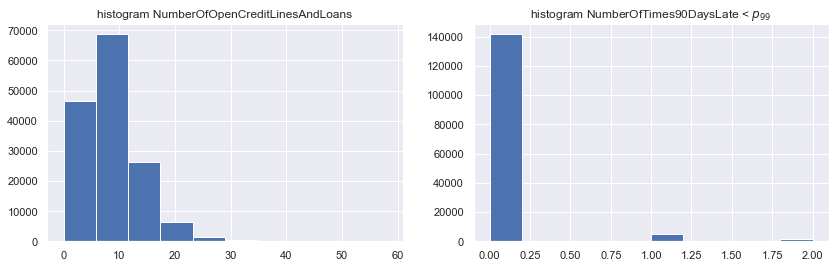

In [66]:
sns.set(rc={'figure.figsize': (14, 4)})
fig, axes = plt.subplots(nrows=1, ncols=2)
title = train.NumberOfOpenCreditLinesAndLoans.hist(
    ax=axes[0]).set_title("histogram NumberOfOpenCreditLinesAndLoans")

p_99 = train.NumberOfTimes90DaysLate.quantile(q=0.99)
title = train.NumberOfTimes90DaysLate[train.NumberOfTimes90DaysLate < p_99].hist(ax=axes[1]).set_title(
    "histogram NumberOfTimes90DaysLate < $p_{99}$")

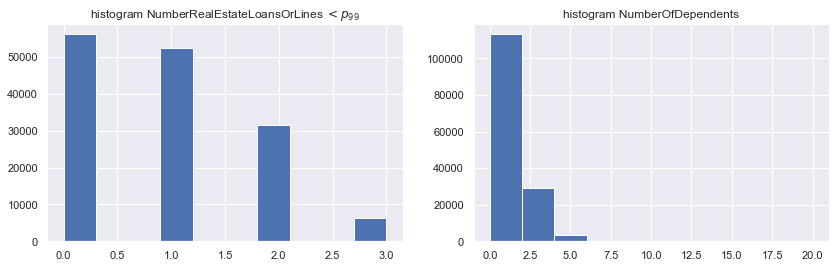

In [71]:
#NumberRealEstateLoansOrLines           
#
#NumberOfDependents   

sns.set(rc={'figure.figsize': (14, 4)})
fig, axes = plt.subplots(nrows=1, ncols=2)
p_99 = train.NumberRealEstateLoansOrLines.quantile(q=0.99)
title = train.NumberRealEstateLoansOrLines[train.NumberRealEstateLoansOrLines < p_99].hist(
    ax=axes[0]).set_title("histogram NumberRealEstateLoansOrLines $< p_{99}$")

title = train.NumberOfDependents.hist(ax=axes[1]).set_title(
    "histogram NumberOfDependents")

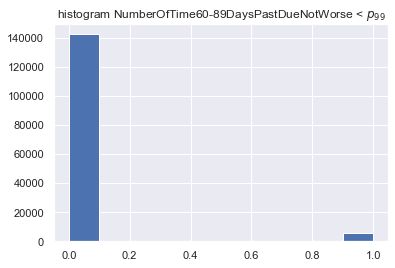

In [81]:
sns.set(rc={'figure.figsize': (6, 4)})
fig, axes = plt.subplots()
p_99 = np.quantile(train["NumberOfTime60-89DaysPastDueNotWorse"], 0.99)
title = train["NumberOfTime60-89DaysPastDueNotWorse"][train["NumberOfTime60-89DaysPastDueNotWorse"]<p_99].hist(
    ax=axes).set_title("histogram NumberOfTime60-89DaysPastDueNotWorse < $p_{99}$")

## Correlations

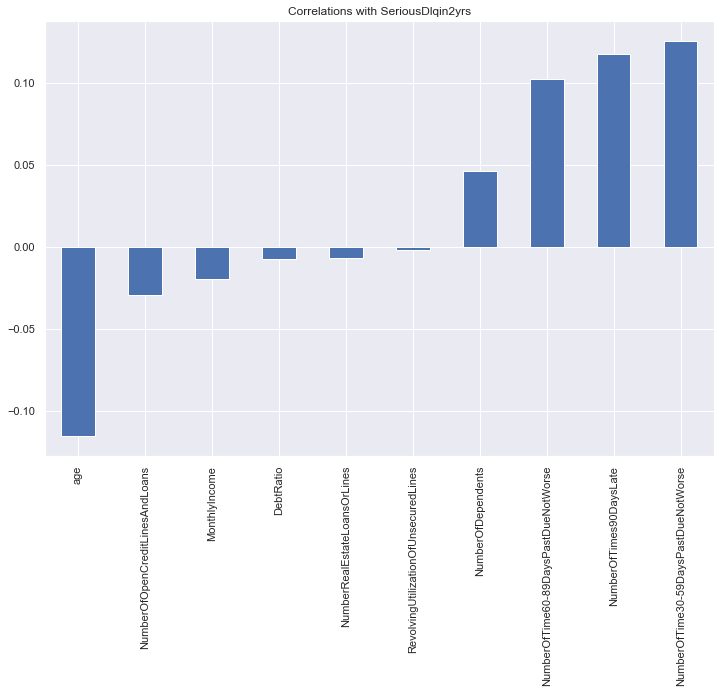

In [77]:
sns.set(rc={'figure.figsize': (12, 8)})
fig, axes = plt.subplots()
title = train.corrwith(train['SeriousDlqin2yrs']).sort_values()[:-1].plot(
    kind="bar", ax=axes).set_title("Correlations with SeriousDlqin2yrs")

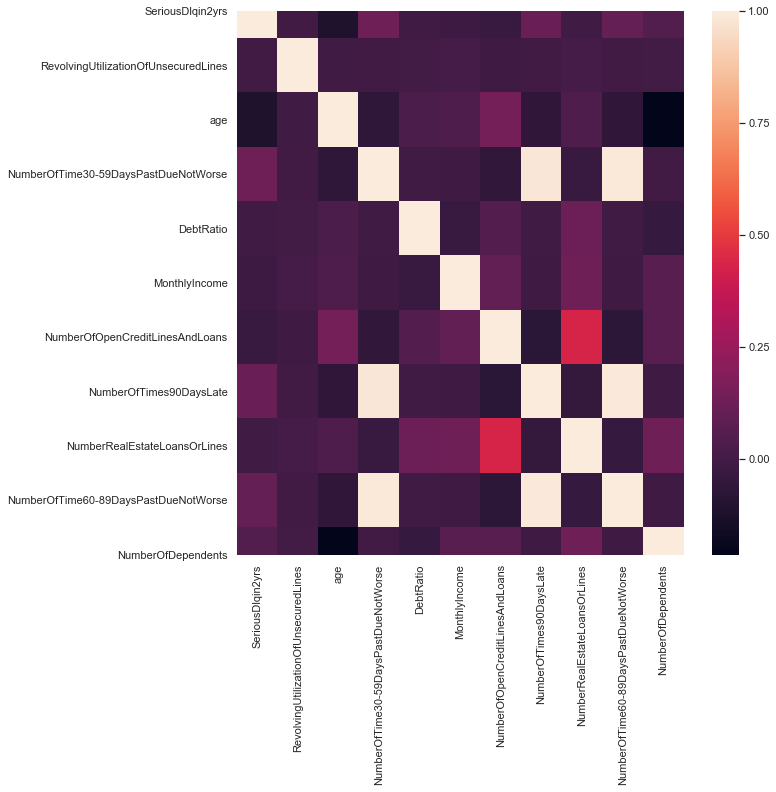

In [78]:
sns.set(rc={'figure.figsize': (10, 10)})
corr = train.corr()

sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
